<a href="https://colab.research.google.com/github/Pager07/FinalYearProject/blob/master/ActionRecognitionClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Ladder Board

- Downloading the data 
-Importing 
  - Fastai
  - Google drive
- Understanding the data 
  - Loading the data
    - setting up variables
      - root_dir (Path to main project folder) 
      - base_dir (Path to data folder)
    - Loading Images 
      - Looking at images in drive and cleaning up data 
- Creating DataObject
  - Loading action labels
  - ItemList
    - spliting it into train and val
- Creating Databunch
  - Look at batches 
    - Clean up the data in Drive

- Creating the learner
  - Finding best LR 

- Fitting the model in smaller(images)
  - Fit frozen layers
  - Unfreez and fit 

- Fitting the mode in larger images 

#Importing FastAi Library

In [0]:
%reload_ext autoreload 
%autoreload 2
%matplotlib inline
from fastai.vision import *

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive' , force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#Understanding the data

In [0]:
root_dir = '/content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data2'
base_dir = root_dir + '/Basketball'
path = Path(base_dir)

In [0]:
img = open_image(path/'train'/'3-pointer failure'/'17_209,68_3-pointer failure.png')

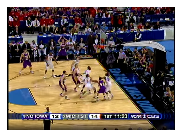

In [8]:
img.show()

#Creating DataObject,DataLoader and Databunch

In [0]:
#We are only fliping the image in the y-axis. I may play around with maz_zoon and wrap later to see how it affects the results
transforms = get_transforms(do_flip=True, max_rotate=None , max_zoom=0 , max_warp=0.)

In [0]:
#When this function is called, it gets passsed the filePath(PATH OBJECT) of the image
#Example: PosixPath('/content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data2/train/2_other 2-pointer failure.png')
def get_label(filePath):
  '''RETURNS LABELS'''
  label = str(filePath).split('/')[-1].split('.')[0].split('_')[-1]
  return label

In [14]:
'''TEST'''
a = path/'train'/'3-pointer failure'/'17_209,68_3-pointer failure.png'
str(a).split('/')[-1].split('.')[0].split('_')[-1]

'3-pointer failure'

In [0]:
'''TEST'''
b = path/'train'/'24_3-pointer success.png'
str(b).split('/')[-1].split('.')[0].split('_')[1]

'3-pointer success'

In [0]:
#Creating Databunch. 
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="train", valid="valid",
                                  ds_tfms = transforms, size =128,
                                  num_workers = 4).normalize(imagenet_stats);

In [21]:
data.c , data.classes , len(data.train_ds) , len(data.valid_ds) , len(data.train_dl) , len(data.valid_dl)

(9,
 ['3-pointer failure',
  '3-pointer success',
  'free-throw failure',
  'free-throw success',
  'layup failure',
  'layup success',
  'other 2-pointer failure',
  'other 2-pointer success',
  'slam dunk'],
 4611,
 576,
 72,
 9)

In [19]:
data.classes

['3-pointer failure',
 '3-pointer success',
 'free-throw failure',
 'free-throw success',
 'layup failure',
 'layup success',
 'other 2-pointer failure',
 'other 2-pointer success',
 'slam dunk']

In [22]:
data

ImageDataBunch;

Train: LabelList (4611 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
3-pointer failure,3-pointer failure,3-pointer failure,3-pointer failure,3-pointer failure
Path: /content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data2/Basketball;

Valid: LabelList (576 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
layup success,layup success,layup success,layup success,layup success
Path: /content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data2/Basketball;

Test: None